# Importing required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import sklearn
from datetime import date, timedelta
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error

from hyperopt import STATUS_OK 
from hyperopt import hp 
from hyperopt import tpe 
from hyperopt import fmin 
from hyperopt import Trials


In [2]:
train= pd.read_csv("/home/khushboo/Documents/Fractal/week6/train.csv")
test = pd.read_csv("/home/khushboo/Documents/Fractal/week6/test_6hcImfB.csv")

In [3]:
train.columns 

Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion',
       'Competition_Metric'],
      dtype='object')

We can see that test dataset doesn't contain User_traffic apart from target variables

In [5]:
train.shape

(512087, 11)

In [6]:
test.shape 

(36000, 9)

In [7]:
train.ID.nunique()

512087

In [8]:
train.nunique()

ID                    512087
Day_No                   882
Course_ID                600
Course_Domain              4
Course_Type                3
Short_Promotion            2
Public_Holiday             2
Long_Promotion             2
User_Traffic            3475
Competition_Metric       196
Sales                    544
dtype: int64

* ID is not affecting target value, we can drop it.
* ID is unique number and it is okay to be integer.

In [9]:
train= train.drop(['ID'], axis=1)

In [10]:
test= test.drop(['ID'], axis=1)

In [11]:
train.Sales.describe() 

count    512087.000000
mean        120.826924
std          54.355258
min           0.000000
25%          84.000000
50%         111.000000
75%         146.000000
max         682.000000
Name: Sales, dtype: float64

#### Check if missing values are available

In [12]:
train.isna().sum()


Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

#### Understand Categorical ratio in variable 

In [13]:
train['Course_Domain'].value_counts()

Development             264295
Software Marketing      166172
Finance & Accounting     77210
Business                  4410
Name: Course_Domain, dtype: int64

In [14]:
train['Course_Type'].value_counts()

Course     262747
Program    247576
Degree       1764
Name: Course_Type, dtype: int64

In [15]:
train['Course_ID'].value_counts()

256    882
152    882
148    882
149    882
405    882
      ... 
432    698
435    698
436    698
181    698
511    698
Name: Course_ID, Length: 600, dtype: int64

Datatypes

In [16]:
train.dtypes

Day_No                  int64
Course_ID               int64
Course_Domain          object
Course_Type            object
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
User_Traffic            int64
Competition_Metric    float64
Sales                   int64
dtype: object


* Day_no is also integer
* Course_Domain, Course_Type,course ID, short promotion, public_holiday and long promotion suppose to be categorical

In [17]:
# data.shape

# Exploratory Data Analysis

(array([6.33870e+04, 2.92106e+05, 1.19724e+05, 2.72570e+04, 7.27300e+03,
        1.84000e+03, 3.90000e+02, 8.60000e+01, 2.00000e+01, 4.00000e+00]),
 array([  0. ,  68.2, 136.4, 204.6, 272.8, 341. , 409.2, 477.4, 545.6,
        613.8, 682. ]),
 <BarContainer object of 10 artists>)

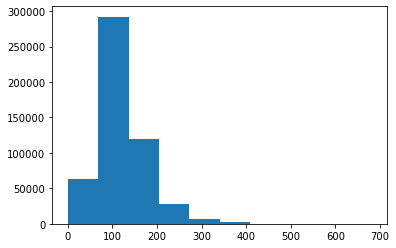

In [18]:
# data=data1
plt.hist(train["Sales"])

### Univariate Analysis 

* Numerical variables

In [19]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
#     print(data[i])
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

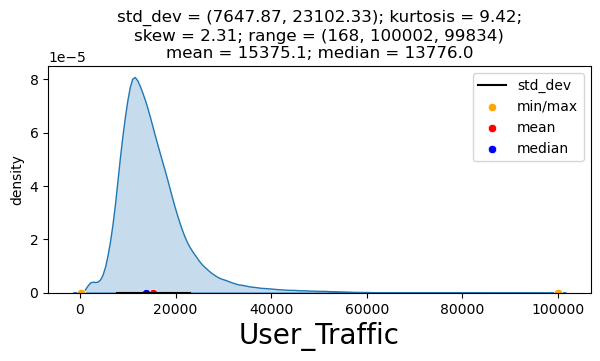

In [20]:
UVA_numeric(train,['User_Traffic'])

In [21]:
group=['Course_ID','Day_No','Competition_Metric']

/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

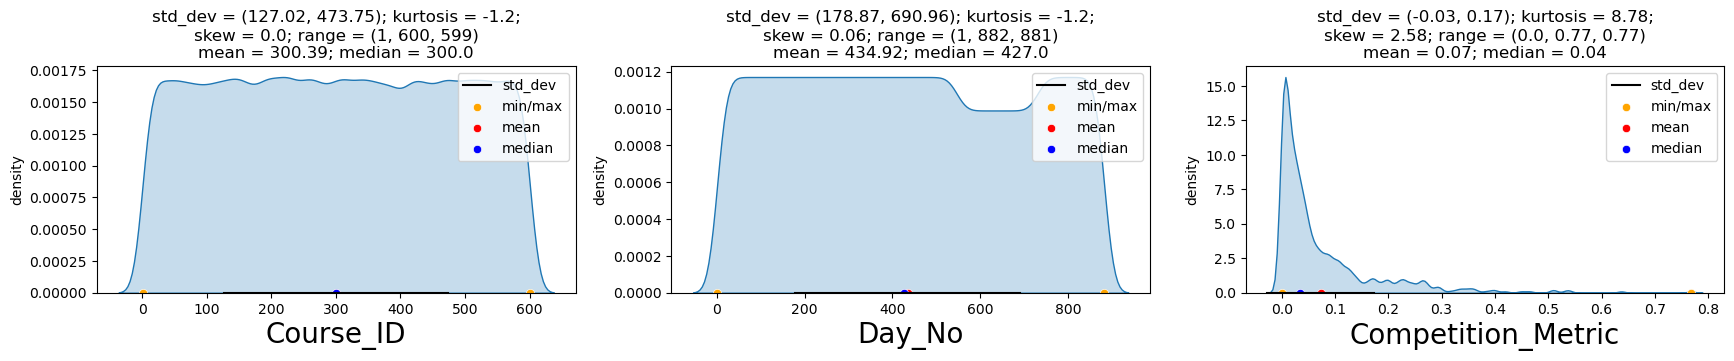

In [22]:
UVA_numeric(train,group)

* We can colclude from plot that User traffic is positively skewed or outliers are present
* we can apply log transformation on it 


/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

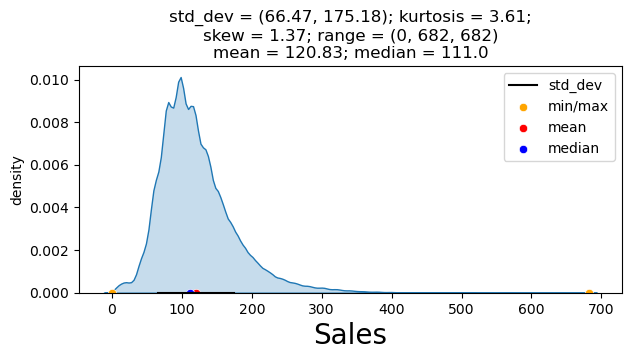

In [23]:
UVA_numeric(train,['Sales'])

* Since kutosis is > 3, we can conclude that Distribution is longer, has Many Outliers

<AxesSubplot:>

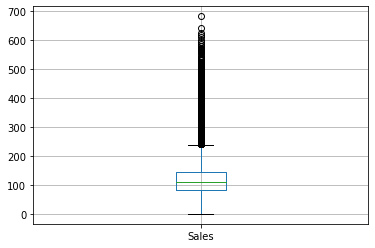

In [24]:
train[['Sales']].boxplot()

* Categorical variables

/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Long_Promotion', ylabel='count'>

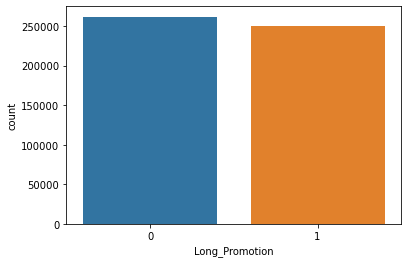

In [25]:
sns.countplot(train['Long_Promotion'])

/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Short_Promotion', ylabel='count'>

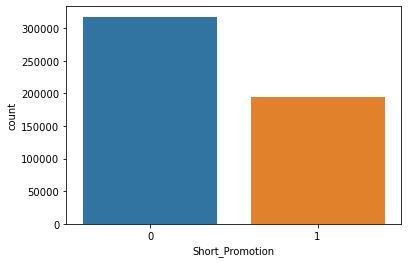

In [26]:
sns.countplot(train['Short_Promotion'])

/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Course_Domain', ylabel='count'>

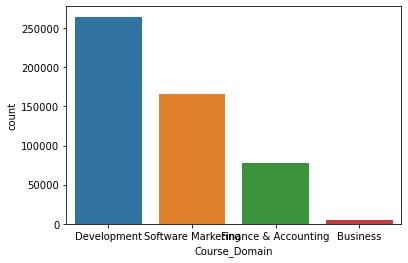

In [27]:
sns.countplot(train['Course_Domain'])

In [28]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

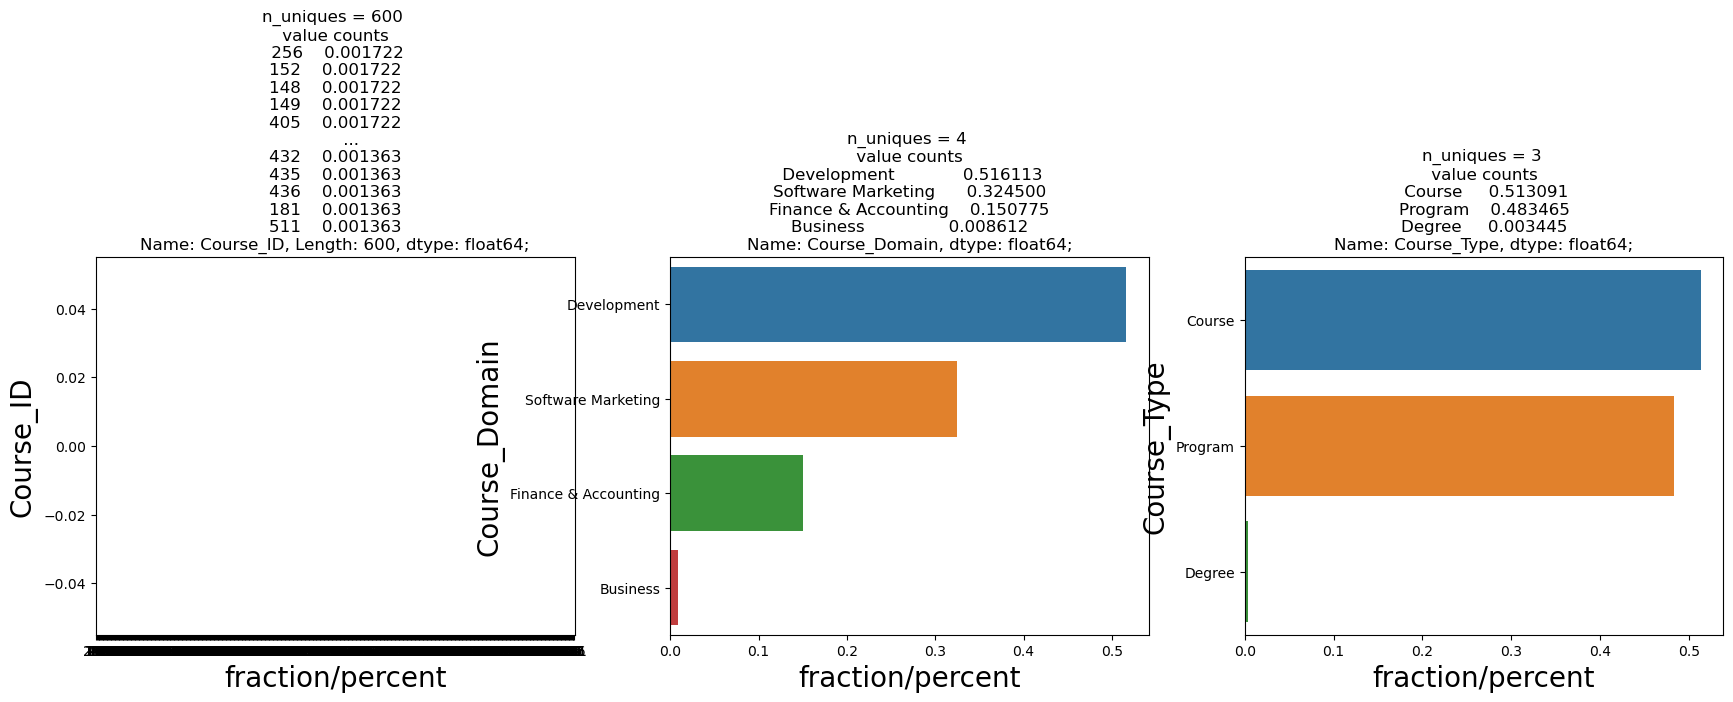

In [29]:
UVA_category(train, ['Course_ID', 'Course_Domain', 'Course_Type'])

* We can see Business make less sales, so to increase the sales marketing or sales team should do something.
* We can also conclude that people are not interested in degree course type.

obviously, sales will be less during public holiday which can be verified from dataset as well.

### Bivariate Analysis

* Numerical-Numerical

In [30]:
# isolating numerical datatypes
numerical = train.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

Day_No                  int64
Course_ID               int64
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
User_Traffic            int64
Competition_Metric    float64
Sales                   int64
dtype: object

<AxesSubplot:>

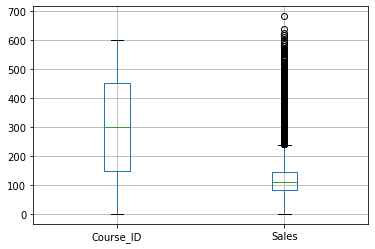

In [31]:
train[['Course_ID','Sales']].boxplot()

<AxesSubplot:>

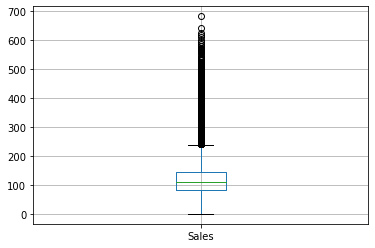

In [32]:
train[['Course_Domain','Sales']].boxplot()

<AxesSubplot:>

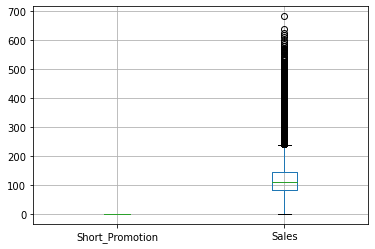

In [33]:
train[['Short_Promotion','Sales']].boxplot()

Normalization can be performed in non-decision based algo

<AxesSubplot:>

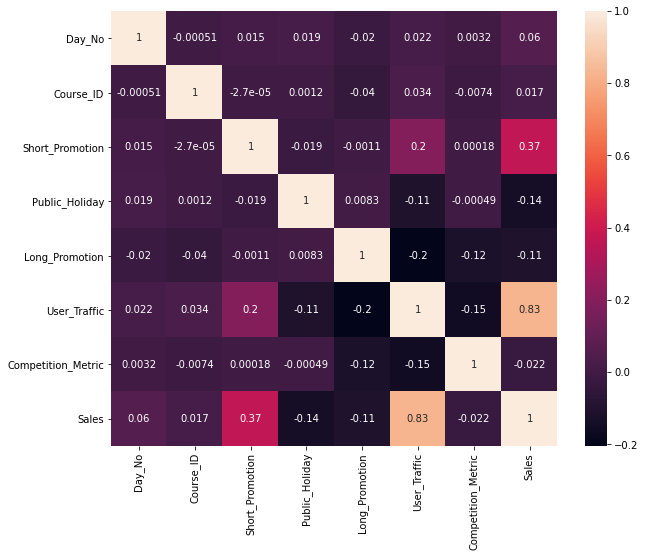

In [34]:
# Lets find the correlation
plt.subplots(figsize=(10,8))
sns.heatmap(train.corr(), annot= True)

User traffic and Sales are highly correlated. In predicting sales it is a important feature

But we can see in test set user traffic is not given, so we can use feature engineering by predicting user traffic first or drop it 

In [35]:
train.corr().unstack().sort_values().drop_duplicates()

User_Traffic        Long_Promotion       -0.204289
Competition_Metric  User_Traffic         -0.148775
Public_Holiday      Sales                -0.135052
Long_Promotion      Competition_Metric   -0.119382
Sales               Long_Promotion       -0.109455
Public_Holiday      User_Traffic         -0.108305
Long_Promotion      Course_ID            -0.039605
Sales               Competition_Metric   -0.022085
Day_No              Long_Promotion       -0.020204
Short_Promotion     Public_Holiday       -0.018770
Competition_Metric  Course_ID            -0.007385
Short_Promotion     Long_Promotion       -0.001149
Course_ID           Day_No               -0.000506
Competition_Metric  Public_Holiday       -0.000491
Course_ID           Short_Promotion      -0.000027
Competition_Metric  Short_Promotion       0.000182
Public_Holiday      Course_ID             0.001242
Day_No              Competition_Metric    0.003229
Public_Holiday      Long_Promotion        0.008319
Day_No              Short_Promo

* Numerical - Categorical

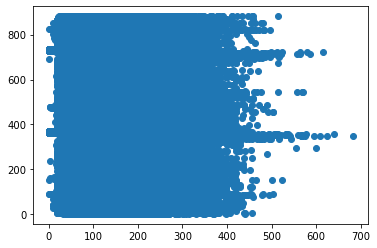

In [36]:
# data1.shar
plt.scatter(train['Sales'], train['Day_No'])

We can conclude that Day_no is not a good estimator 

In [37]:
train.dtypes

Day_No                  int64
Course_ID               int64
Course_Domain          object
Course_Type            object
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
User_Traffic            int64
Competition_Metric    float64
Sales                   int64
dtype: object

How Course_Domain is influenciung Sales?
How Course_type is influencing Sales ?
affect of promotions on sales ?
public holiday leads to decrement in sales ?

In [38]:
import seaborn as sns


<AxesSubplot:xlabel='Course_Domain', ylabel='Sales'>

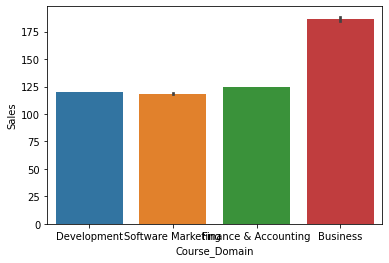

In [39]:
sns.barplot(x="Course_Domain", y="Sales", data=train[:])

<AxesSubplot:xlabel='Course_Type', ylabel='Sales'>

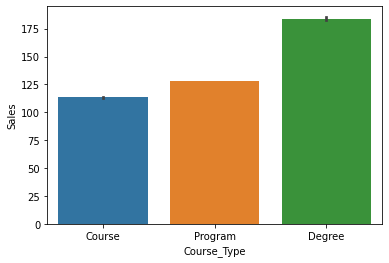

In [40]:
sns.barplot(x="Course_Type", y="Sales", data=train[:])

In [41]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [42]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [43]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][(data[cat]==category)][:]
  x2 = data[cont][~(data[cat]==category)][:]
#   print(x1)
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


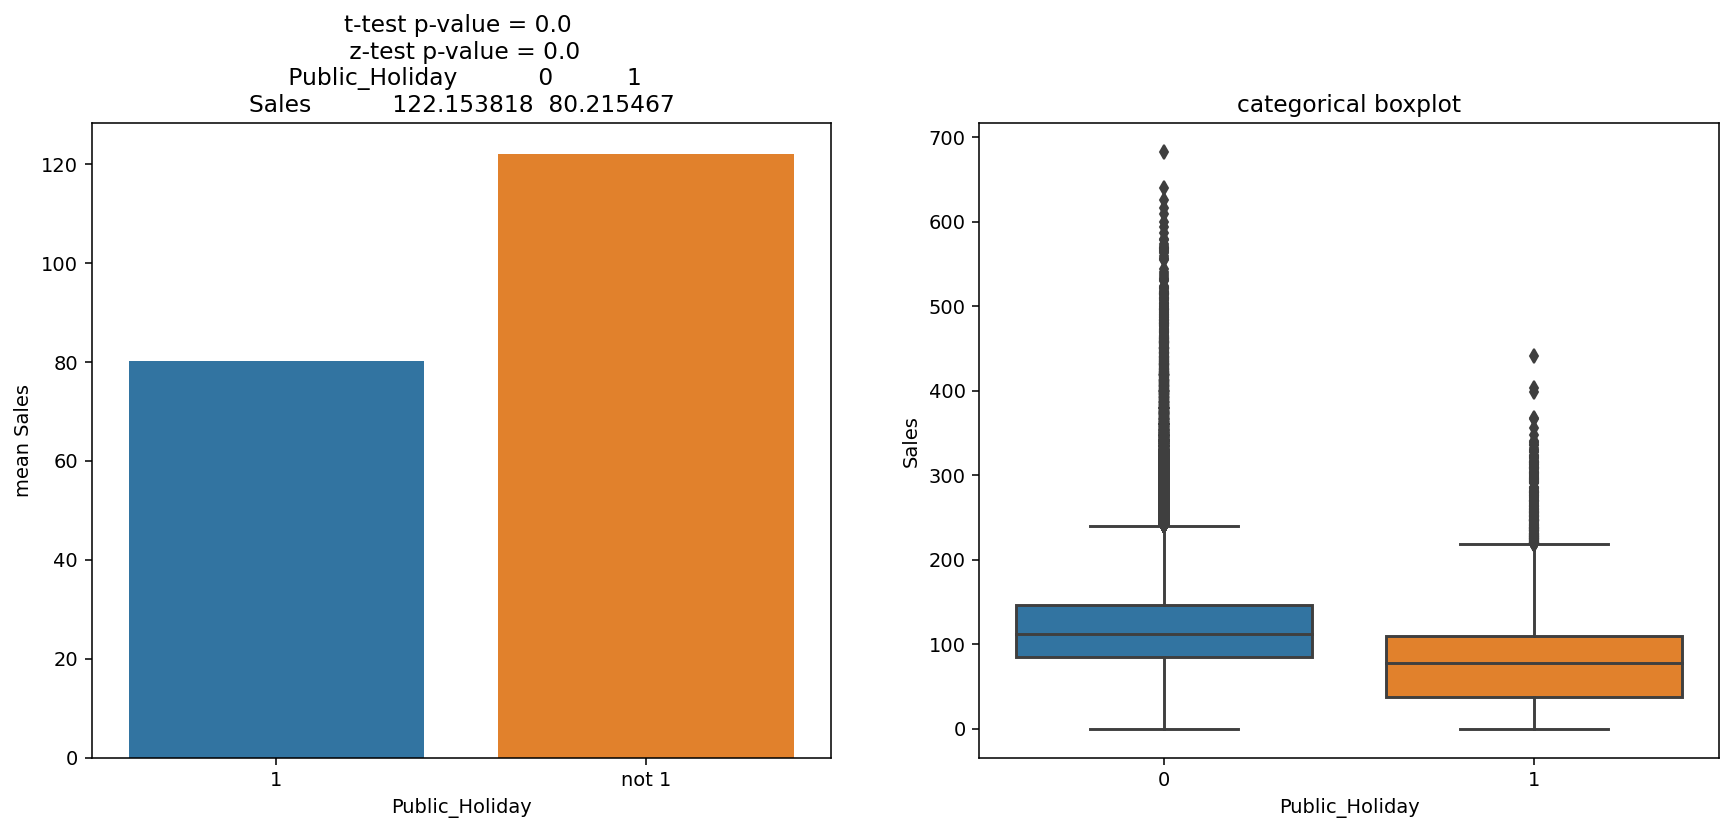

In [44]:
Bivariate_cont_cat(train, "Sales", "Public_Holiday", 1)

We can safely reject the hypothesis that public holiday leads to increase in sales 

/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


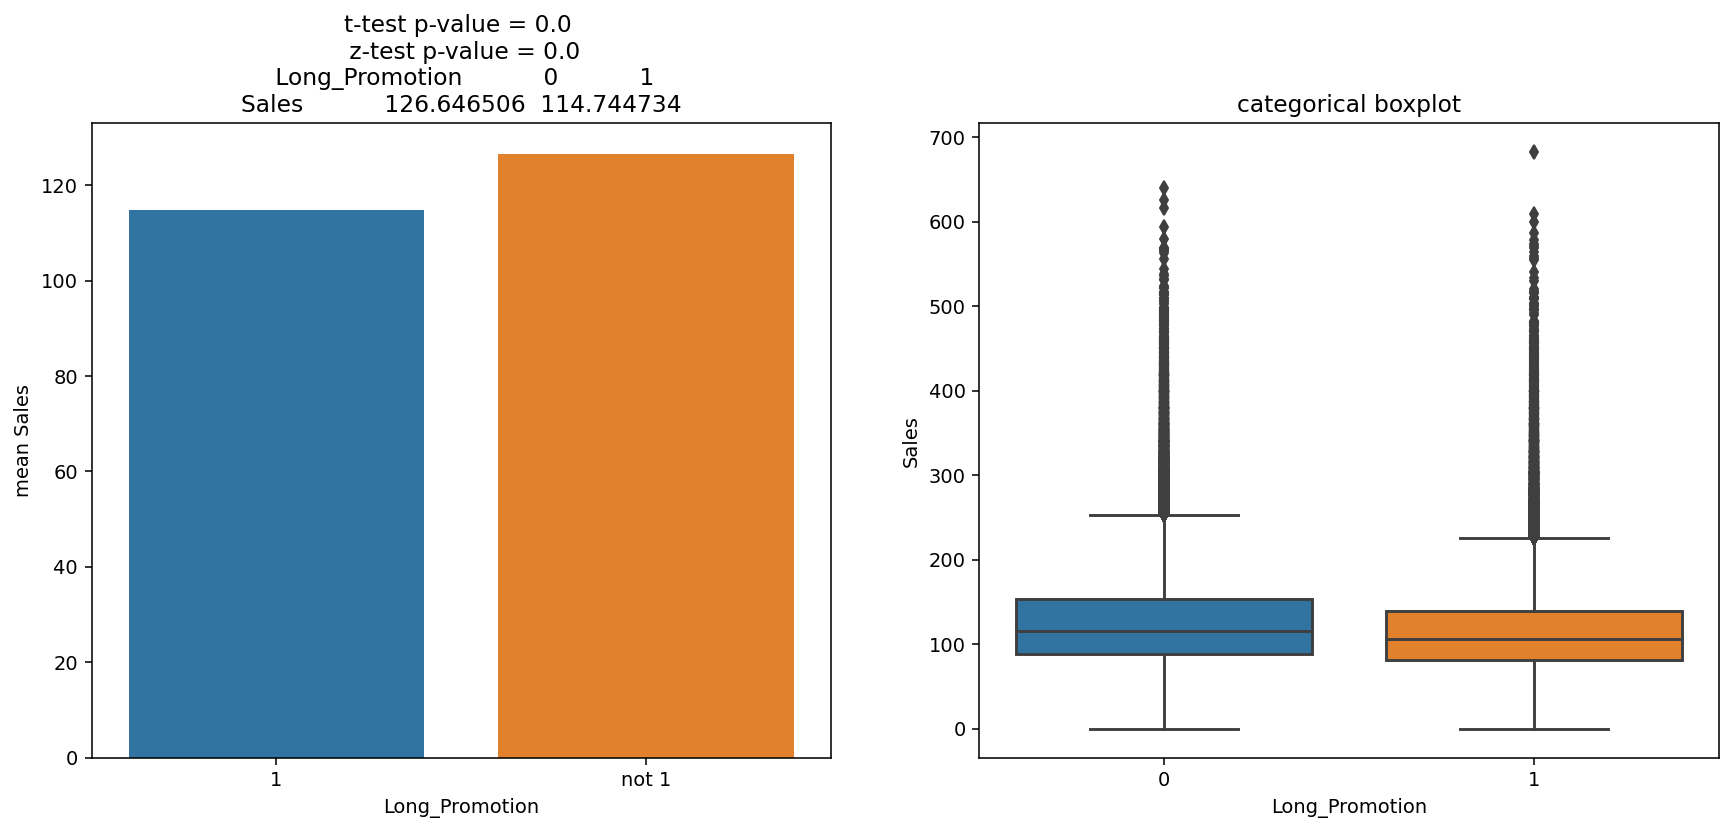

In [45]:
Bivariate_cont_cat(train, "Sales", "Long_Promotion", 1)

We can safely reject the hypothesis that long promotion leads to decrease in sales 

/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


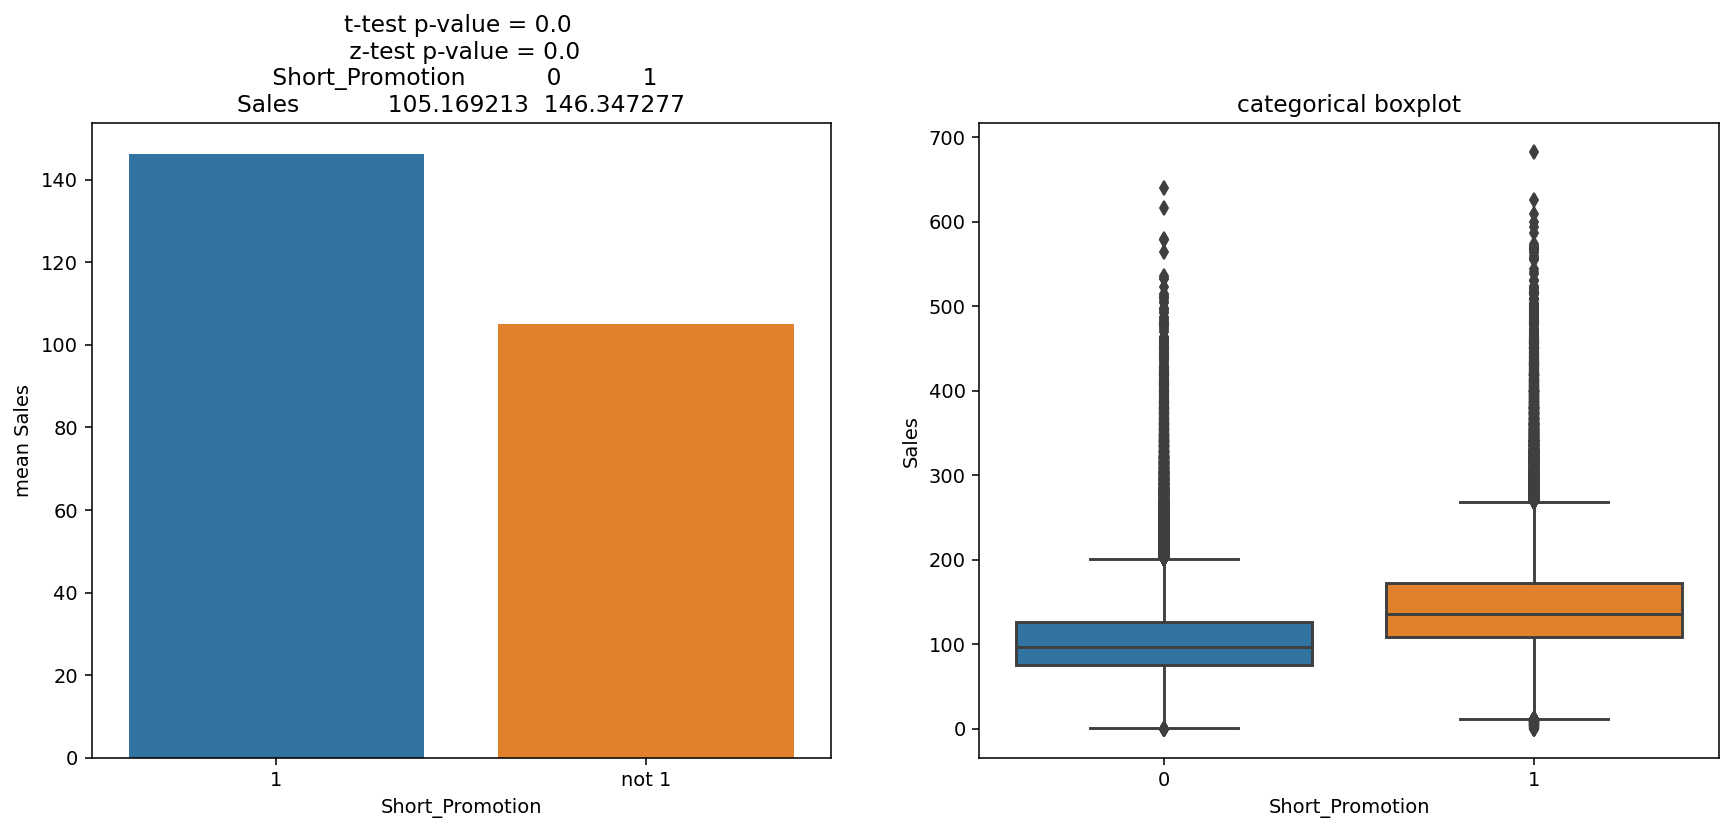

In [46]:
Bivariate_cont_cat(train, "Sales", "Short_Promotion", 1)

In [47]:
# aggregation_functions = {'Sales': 'sum'}
# data1 = train.groupby(train[train['Course_Type'] == 'Software Marketing']['Course_ID']).aggregate(aggregation_functions)
# # sns.scatterplot(x=data1.index,y=data1['Sales'])
# sns.barplot(x=data1.index,y=data1['Sales'])

# Outliers

<AxesSubplot:xlabel='Course_Domain', ylabel='Sales'>

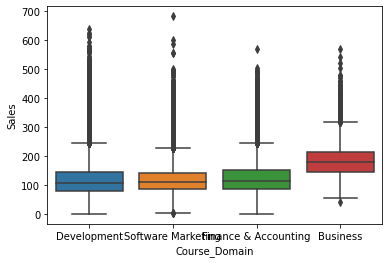

In [48]:
sns.boxplot(x='Course_Domain',y='Sales',data=train)

Boxplot shows very similar distribution with outliers on the lower end

<AxesSubplot:xlabel='Day_No'>

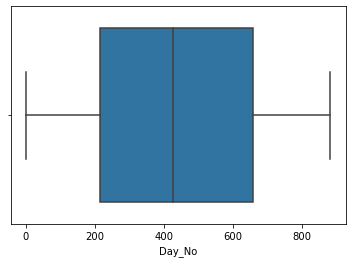

In [49]:
sns.boxplot(x='Day_No',data=train)

# Pre-Processing

### Creating new features

In [50]:
avg_sales = train.groupby(['Course_ID','Course_Domain','Course_Type','Short_Promotion','Public_Holiday','Long_Promotion'])['Sales'].mean().reset_index()

In [51]:
def day_to_date(dataset):
    start = date(2018,12,31)
    dataset['Date'] = dataset['Day_No'].apply(lambda x: start + timedelta(x)) 

def day_month_year(dataset): 
    dataset['Day'] = dataset['Date'].apply(lambda x: x.day)
    dataset['Month'] = dataset['Date'].apply(lambda x: x.month)
    dataset['Year'] = dataset['Date'].apply(lambda x: x.year)
    dataset['Day_of_week']= dataset['Date'].apply(lambda x: x.weekday())

In [52]:
day_to_date(train)
day_month_year(train)
day_to_date(test)
day_month_year(test)

In [53]:
train

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Date,Day,Month,Year,Day_of_week
0,1,1,Development,Course,0,1,1,11004,0.007,81,2019-01-01,1,1,2019,1
1,2,1,Development,Course,0,0,1,13650,0.007,79,2019-01-02,2,1,2019,2
2,3,1,Development,Course,0,0,1,11655,0.007,75,2019-01-03,3,1,2019,3
3,4,1,Development,Course,0,0,1,12054,0.007,80,2019-01-04,4,1,2019,4
4,5,1,Development,Course,0,0,1,6804,0.007,41,2019-01-05,5,1,2019,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512082,878,600,Software Marketing,Program,0,0,1,8904,0.070,114,2021-05-27,27,5,2021,3
512083,879,600,Software Marketing,Program,0,0,1,10542,0.070,145,2021-05-28,28,5,2021,4
512084,880,600,Software Marketing,Program,0,0,1,13671,0.070,167,2021-05-29,29,5,2021,5
512085,881,600,Software Marketing,Program,0,0,1,8904,0.070,107,2021-05-30,30,5,2021,6


Since test doesnt contain User Traffic, we are removing it

In [54]:
train.drop('User_Traffic',axis =1, inplace = True)

In [55]:
train.shape

(512087, 14)

In [56]:
test.shape 

(36000, 13)

In [57]:
# merge train and test
df = train.append(test)

In [58]:
df.isna().sum()

Day_No                    0
Course_ID                 0
Course_Domain             0
Course_Type               0
Short_Promotion           0
Public_Holiday            0
Long_Promotion            0
Competition_Metric     1884
Sales                 36000
Date                      0
Day                       0
Month                     0
Year                      0
Day_of_week               0
dtype: int64

#### Replacing missing values with median 

In [59]:
df['Competition_Metric'].fillna(df['Competition_Metric'].median(), inplace = True)

#### Converting categorical to integer 

In [60]:
df1=pd.get_dummies(df,columns=['Course_Domain','Course_Type'],drop_first=True)

In [61]:
df1.dtypes

Day_No                                  int64
Course_ID                               int64
Short_Promotion                         int64
Public_Holiday                          int64
Long_Promotion                          int64
Competition_Metric                    float64
Sales                                 float64
Date                                   object
Day                                     int64
Month                                   int64
Year                                    int64
Day_of_week                             int64
Course_Domain_Development               uint8
Course_Domain_Finance & Accounting      uint8
Course_Domain_Software Marketing        uint8
Course_Type_Degree                      uint8
Course_Type_Program                     uint8
dtype: object

In [62]:
df1.shape

(548087, 17)

In [63]:
df1.columns 

Index(['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric', 'Sales', 'Date', 'Day', 'Month',
       'Year', 'Day_of_week', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program'],
      dtype='object')

In [64]:
# dropping columns 
df1.drop(['Day_No','Date'],axis = 1,inplace = True)

### Generating train, test from df1

In [65]:

train1= df1[df1['Sales'].isnull()!= True]
test1= df1[df1['Sales'].isnull()== True].drop(['Sales'], axis=1)
print(train1.shape)
print(test1.shape)

(512087, 15)
(36000, 14)


In [66]:
X_train = train1.drop('Sales',axis = 1)
Y_train = train.Sales
X_test = test1

In [67]:
print(X_train.columns)
print(Y_train)
print(X_test.columns)


Index(['Course_ID', 'Short_Promotion', 'Public_Holiday', 'Long_Promotion',
       'Competition_Metric', 'Day', 'Month', 'Year', 'Day_of_week',
       'Course_Domain_Development', 'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program'],
      dtype='object')
0          81
1          79
2          75
3          80
4          41
         ... 
512082    114
512083    145
512084    167
512085    107
512086    152
Name: Sales, Length: 512087, dtype: int64
Index(['Course_ID', 'Short_Promotion', 'Public_Holiday', 'Long_Promotion',
       'Competition_Metric', 'Day', 'Month', 'Year', 'Day_of_week',
       'Course_Domain_Development', 'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program'],
      dtype='object')


In [68]:
# Y_train = np.log1p(Y_train)

In [69]:
train_x,val_x,train_y,val_y = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 890)

In [70]:
lgb_train = lgb.Dataset(train_x, train_y)
lgb_val = lgb.Dataset(val_x, val_y)

In [71]:
N_FOLDS = 5

In [72]:
def rmsle(preds, lgb_train): 
    eval_name = 'rmsle' 
    eval_result = np.sqrt(mean_squared_log_error(preds, lgb_train.get_label())) 
    return (eval_name, eval_result*1000, False)

In [73]:
def objective(params, n_folds = N_FOLDS): 
    cv_results = lgb.cv(params, lgb_train, num_boost_round = 1000, nfold = 5, feval = rmsle, early_stopping_rounds = 10, seed = 50) 
    best_score = min(cv_results['rmsle-mean']) 
    return {'loss': best_score, 'params': params, 'status': STATUS_OK}

In [74]:
space = { 'task': hp.choice('task', ['train']), 'objective': hp.choice('objective', ['gamma']), 'metric' : hp.choice('metric', ['None']), 'boosting': hp.choice('boosting', ['gbdt']), 'learning_rate': hp.loguniform('learning_rate',np.log(0.003), np.log(0.5)), 'num_leaves': hp.choice('num_leaves', range(2, 100, 5)), 'max_depth': hp.choice('max_depth', range(1, 30, 5)), 'bagging_fraction': hp.uniform('bagging_fraction', 0.1, 1.0), 'bagging_freq': hp.choice('bagging_freq', range(1, 10, 1)), 'feature_fraction': hp.uniform('feature_fraction', 0.1, 1.0), 'max_bin': hp.choice('max_bin', range(200, 256, 5)), 'min_data_in_leaf': hp.choice('min_data_in_leaf', range(10, 1000, 1)), 'subsample': hp.uniform('subsample', 0.1, 1.0), 'bagging_seed': hp.choice('bagging_seed', range(1, 10, 1)), 'feature_fraction_seed': hp.choice('feature_fraction_seed', range(1, 10, 1)), }

In [75]:
from sklearn.metrics import mean_squared_log_error

In [76]:
evals_result = {} 
params = {
        'task': 'train',
        'objective': 'gamma',
        'metric' : 'None',
        'boosting': 'gbdt',
        'learning_rate': 0.03,
        'num_leaves': 100,
        'bagging_fraction': 0.85,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'n_estimators': 1000,
    }
def rmsle(preds, lgb_train):
    eval_name = "rmsle"
    eval_result = np.sqrt(mean_squared_log_error(preds, lgb_train.get_label()))
    return (eval_name, eval_result*1000, False)


cv_results = lgb.cv(params, lgb_train, num_boost_round = 1000, nfold = 5, feval = rmsle, early_stopping_rounds = 10, verbose_eval = 100, seed = 50)

lgbm_model = lgb.train(params, train_set = lgb_train, valid_sets = lgb_val, feval = rmsle,  evals_result = evals_result, verbose_eval = 100)

/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/lightgbm/engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines


/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 327735, number of used features: 14
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 327735, number of used features: 14
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 327735, number of used features:

/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 409669, number of used features: 14
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4.794179
[100]	valid_0's rmsle: 262.984
[200]	valid_0's rmsle: 195.961
[300]	valid_0's rmsle: 169.164
[400]	valid_0's rmsle: 155.079
[500]	valid_0's rmsle: 146.052
[600]	valid_0's rmsle: 140.18
[700]	valid_0's rmsle: 135.277
[800]	valid_0's rmsle: 131.317
[900]	valid_0's rmsle: 128.422
[1000]	valid_0's rmsle: 126.062


In [77]:
predictions = lgbm_model.predict(X_test)
# predictions= np.expm1(predictions)

In [78]:
len(predictions)

36000

In [79]:
sample= pd.DataFrame(predictions)

In [80]:
test_data = pd.read_csv("/home/khushboo/Documents/Fractal/week6/test_6hcImfB.csv")

In [81]:
sample['ID']= test_data["ID"]
sample=sample.rename(columns={0: "Sales"})
sample['Sales'] = sample['Sales'].apply(np.ceil)

In [87]:
sample

,Sales,ID
0,124.0,883
1,121.0,884
2,110.0,885
3,104.0,886
4,63.0,887
...,...,...
35995,160.0,548083
35996,129.0,548084
35997,130.0,548085
35998,150.0,548086


In [110]:
sample1 = sample.drop(['XG Boost','LightGBM'], axis=1)

In [111]:
sample1.head()

,Sales_by_lgbm,ID
0,124.0,883
1,121.0,884
2,110.0,885
3,104.0,886
4,63.0,887


In [112]:
sample1 = sample1[['ID', 'Sales_by_lgbm']]

In [115]:
sample1 = sample1.rename(columns={'Sales_by_lgbm': "Sales"})

In [116]:
sample1

,ID,Sales
0,883,124.0
1,884,121.0
2,885,110.0
3,886,104.0
4,887,63.0
...,...,...
35995,548083,160.0
35996,548084,129.0
35997,548085,130.0
35998,548086,150.0


In [117]:
sample1.to_csv('/home/khushboo/Documents/Fractal/week6/hackathon_learnx_126.csv',index=False)

In [83]:
from sklearn.ensemble import RandomForestRegressor

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [84]:
def rmsle1000(y_true, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000

In [85]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [89]:
#xgb
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=123)

X_train = train1.drop('Sales',axis = 1)
Y_train = train.Sales
Y_train = Y_train
X_test = test1

cv_score =[]
i=1
for train_index,test_index in kf.split(X_train, Y_train):
    print('Fold no. = ', i)
    
    x_train, x_test = X_train.loc[train_index], X_train.loc[test_index]
    y_train, y_test = Y_train.loc[train_index], Y_train.loc[test_index]
    
    #model
    xgb = XGBRegressor(n_estimators= 500)
    xgb.fit(x_train, y_train)
    y_pred= xgb.predict(x_test)
    score = rmsle1000(y_test, y_pred)
    print('RMSLE score:',score)
    cv_score.append(score)    
    
    i+=1

/home/khushboo/miniconda3/envs/fractal/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold no. =  1


<ipython-input-84-e9ff9a488ff0>:2: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000


RMSLE score: 144.8577825382395
Fold no. =  2
RMSLE score: 145.9101077667349
Fold no. =  3
RMSLE score: 146.24058893473713
Fold no. =  4
RMSLE score: 143.1976027135867
Fold no. =  5
RMSLE score: 143.94445943081047


In [90]:
cv_score

[144.8577825382395,
 145.9101077667349,
 146.24058893473713,
 143.1976027135867,
 143.94445943081047]

In [91]:
xgb.feature_importances_

array([0.0808991 , 0.1686231 , 0.05461681, 0.11530127, 0.07885364,
       0.02113677, 0.02278822, 0.01395076, 0.02856055, 0.09954492,
       0.05324371, 0.05543887, 0.11874522, 0.08829703], dtype=float32)

In [100]:
xgb = XGBRegressor(n_estimators= 500)
xgb.fit(X_train,Y_train)
xgb_preds = xgb.predict(X_test)
# xgb_preds= np.expm1(xgb_preds)

In [101]:
# for submission
lgbm = LGBMRegressor(n_estimators= 500)
lgbm.fit(X_train, Y_train)
lgbm_preds = lgbm.predict(X_test)
# lgbm_preds=np.expm1(lgbm_preds)

In [102]:
print(xgb_preds)

[133.3988  138.05266 113.91614 ... 133.4679  162.2075  173.78261]


In [103]:
print(lgbm_preds)

[132.32942463 119.61123243 114.21857291 ... 133.54291889 151.53918006
 151.78653176]


In [104]:
sample.rename(columns = {'Sales':'Sales_by_lgbm'},inplace = True)

In [105]:
sample['XG Boost'] = xgb_preds

In [106]:
sample['LightGBM'] = lgbm_preds

In [107]:
#Predictions of various modles
sample

,Sales_by_lgbm,ID,XG Boost,LightGBM
0,124.0,883,133.398804,132.329425
1,121.0,884,138.052658,119.611232
2,110.0,885,113.916138,114.218573
3,104.0,886,104.568123,108.496696
4,63.0,887,61.233875,69.250938
...,...,...,...,...
35995,160.0,548083,155.172989,155.233640
35996,129.0,548084,132.762177,130.475153
35997,130.0,548085,133.467896,133.542919
35998,150.0,548086,162.207504,151.539180


In [119]:
sample2= sample.drop(['LightGBM','Sales_by_lgbm'], axis=1)

In [120]:
sample2

,ID,XG Boost
0,883,133.398804
1,884,138.052658
2,885,113.916138
3,886,104.568123
4,887,61.233875
...,...,...
35995,548083,155.172989
35996,548084,132.762177
35997,548085,133.467896
35998,548086,162.207504


In [121]:
sample1.to_csv('/home/khushboo/Documents/Fractal/week6/hackathon_learnx_143_XGboost.csv',index=False)

In [122]:
sample3= sample.drop(['XG Boost','Sales_by_lgbm'], axis=1)

In [124]:
sample1.to_csv('/home/khushboo/Documents/Fractal/week6/hackathon_learnx_143_LightGBM.csv',index=False)

In [ ]:
# # converting to categorical 
# data['Public_Holiday'] = data['Public_Holiday'].astype('category')
# data['Short_Promotion'] = data['Short_Promotion'].astype('category')
# data['Long_Promotion'] = data['Long_Promotion'].astype('category')
# # data['Course_ID'] = data['Course_ID'].astype('category')
# # I am not converting course_id for now 
# # to categorical from objects
# data['Course_Domain'] = data['Course_Domain'].astype('category')
# data['Course_Type'] = data['Course_Type'].astype('category')
# data.dtypes[data.dtypes == 'int64']